In [8]:
!pip install mlxtend

In [9]:
from mlxtend.preprocessing import TransactionEncoder

In [10]:
from mlxtend.frequent_patterns import apriori,association_rules
import pandas as pd
import numpy as np

In [19]:
data=[['A','B','E'],['D','B'],['B','C'],['A','B','D'],['A','C'],['B','C'],['A','C'],['A','B','C','E'],['A','B','C']]
te=TransactionEncoder()
print(te)
te_array=te.fit_transform(data)
print(te_array)


TransactionEncoder()
[[ True  True False False  True]
 [False  True False  True False]
 [False  True  True False False]
 [ True  True False  True False]
 [ True False  True False False]
 [False  True  True False False]
 [ True False  True False False]
 [ True  True  True False  True]
 [ True  True  True False False]]


In [20]:

df=pd.DataFrame(te_array,columns=te.columns_)
print(df)

       A      B      C      D      E
0   True   True  False  False   True
1  False   True  False   True  False
2  False   True   True  False  False
3   True   True  False   True  False
4   True  False   True  False  False
5  False   True   True  False  False
6   True  False   True  False  False
7   True   True   True  False   True
8   True   True   True  False  False


In [18]:
frq_items = apriori(df,min_support=0.2222,use_colnames=True)
print(frq_items)

     support   itemsets
0   0.666667        (A)
1   0.777778        (B)
2   0.666667        (C)
3   0.222222        (D)
4   0.222222        (E)
5   0.444444     (A, B)
6   0.444444     (A, C)
7   0.222222     (E, A)
8   0.444444     (C, B)
9   0.222222     (D, B)
10  0.222222     (E, B)
11  0.222222  (C, A, B)
12  0.222222  (E, A, B)


In [24]:
rules=association_rules(frq_items,metric='confidence',min_threshold=0.5,num_itemsets=3)
print(rules[['antecedents' ,'consequents','support','confidence']])

   antecedents consequents   support  confidence
0          (A)         (B)  0.444444    0.666667
1          (B)         (A)  0.444444    0.571429
2          (A)         (C)  0.444444    0.666667
3          (C)         (A)  0.444444    0.666667
4          (E)         (A)  0.222222    1.000000
5          (C)         (B)  0.444444    0.666667
6          (B)         (C)  0.444444    0.571429
7          (D)         (B)  0.222222    1.000000
8          (E)         (B)  0.222222    1.000000
9       (A, C)         (B)  0.222222    0.500000
10      (B, C)         (A)  0.222222    0.500000
11      (A, B)         (C)  0.222222    0.500000
12      (E, A)         (B)  0.222222    1.000000
13      (E, B)         (A)  0.222222    1.000000
14      (A, B)         (E)  0.222222    0.500000
15         (E)      (A, B)  0.222222    1.000000


In [25]:
rules=association_rules(frq_items,metric='confidence',min_threshold=0.75,num_itemsets=3)
print(rules[['antecedents' ,'consequents','support','confidence']])

  antecedents consequents   support  confidence
0         (E)         (A)  0.222222         1.0
1         (D)         (B)  0.222222         1.0
2         (E)         (B)  0.222222         1.0
3      (E, A)         (B)  0.222222         1.0
4      (E, B)         (A)  0.222222         1.0
5         (E)      (A, B)  0.222222         1.0


# To perform Linear Regression

In [27]:
!pip install kagglehub


   ---------------------------------------- 0.0/51.9 kB ? eta -:--:--
   ---------------------------------------- 51.9/51.9 kB 2.6 MB/s eta 0:00:00


In [31]:
df = pd.read_csv('weather.csv')

print(df) 

     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.0  ...           29   
1      

In [32]:
import matplotlib.pyplot as plt

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

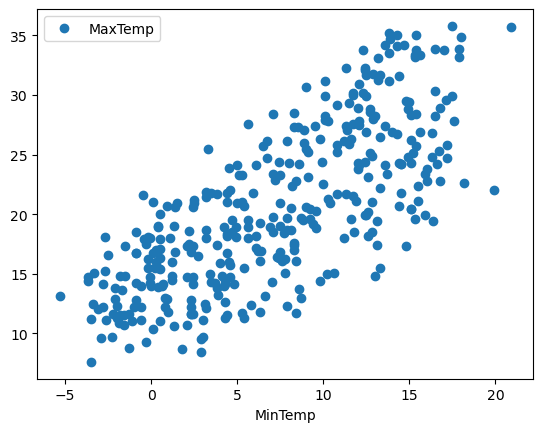

In [41]:
plot =df.plot(x='MinTemp',y='MaxTemp',style='o')
#plot.title('Min vs Max')
#plot.xlabel('mintemp')

#plot.ylabel('maxtemp')

In [45]:
X=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)
df2=pd.DataFrame({'Actual':y_test.flatten(),'Predict': y_pred.flatten()})
print(df2)

    Actual    Predict
0     25.2  23.413030
1     11.5  13.086857
2     21.1  27.264856
3     22.2  25.461874
4     20.4  26.937041
..     ...        ...
69    18.9  20.216833
70    22.8  27.674625
71    16.1  21.446140
72    25.1  24.970151
73    12.2  14.070302

[74 rows x 2 columns]


<Axes: >

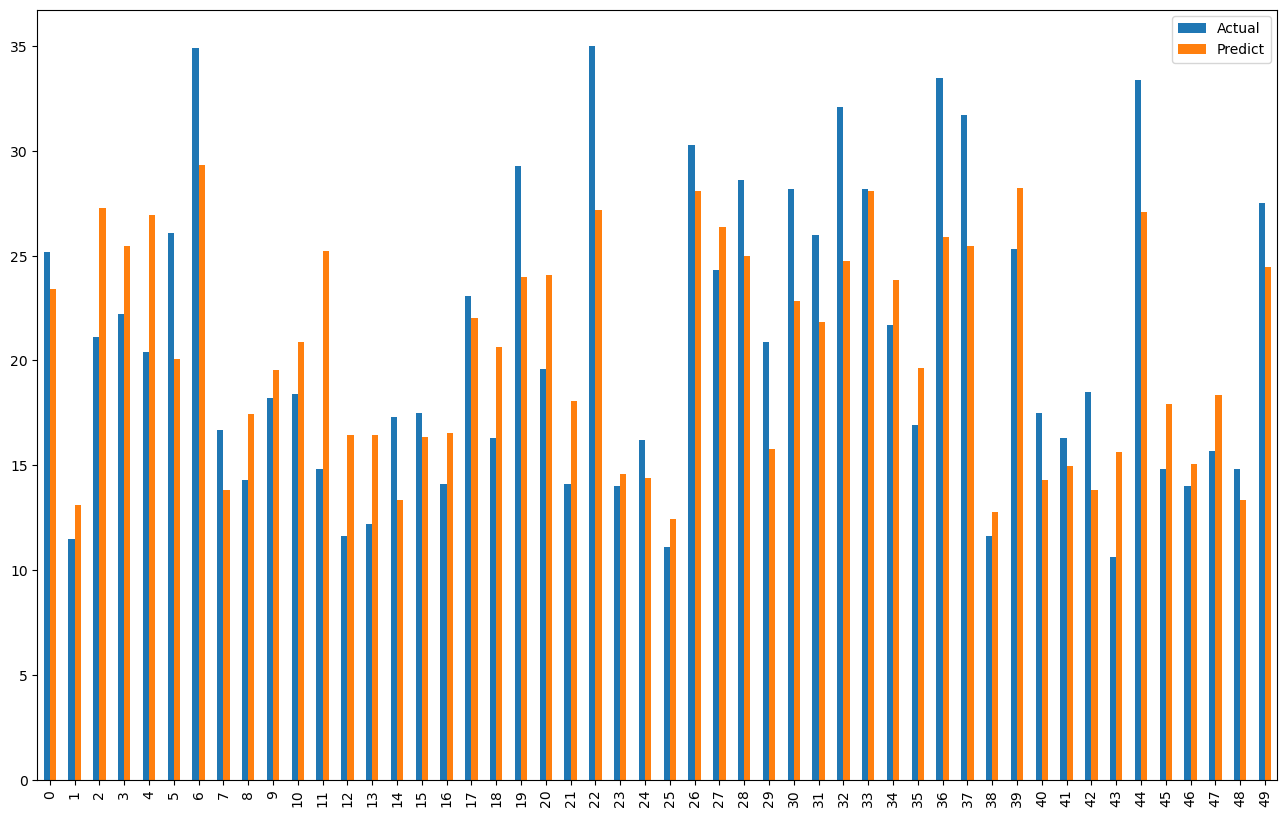

In [59]:
df3=df2.head(50)
df3.plot(kind='bar',figsize=(16,10))

#plt.bar(y_test.flatten(),y_pred.flatten())

In [61]:
c=model.intercept_
m=model.coef_

Mean absolute eror <function mean_absolute_error at 0x0000022A35B75DA0>
Mean squared  eror <function mean_squared_error at 0x0000022A35B76160>
Root Mean Squared eror <function root_mean_squared_error at 0x0000022A35B762A0>


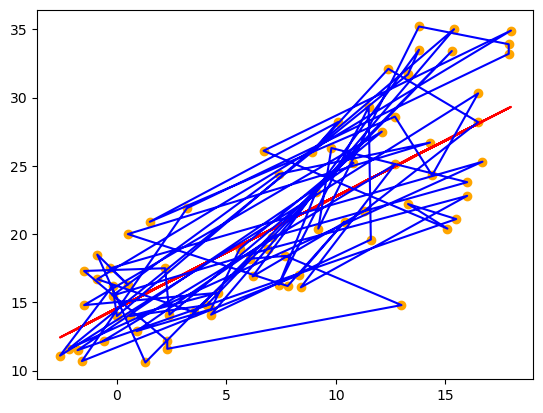

In [73]:
plt.scatter(X_test,y_test,color='orange')
plt.plot(X_test,y_pred,color='red')

plt.plot(X_test,y_test,color='blue')
print("Mean absolute eror" , metrics.mean_absolute_error)

print("Mean squared  eror" , metrics.mean_squared_error)

print("Root Mean Squared eror" ,metrics.root_mean_squared_error)